In [1]:
import os
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

## Stylesheet for consistency

In [2]:
plt.style.use('../../supplimentary_material/plotting_style_sheet.txt')

## Generates lists of data files

In [3]:
scintx_mu = sorted(glob('Grant_Data_updated/scintX_MACs/*'))
water_mu = sorted(glob('Grant_Data_updated/water_MACs/*'))

In [4]:
Xenergies = list()
Xattenuations = list()

for file in scintx_mu:
    _, energy = os.path.basename(file).rstrip('.txt').split('_')
    Xenergies.append(float(energy))
    μ = np.loadtxt(file)
    Xattenuations.append(μ)
    
Wenergies = list()
Wattenuations = list()

for file in water_mu:
    _, energy = os.path.basename(file).rstrip('.txt').split('_')
    Wenergies.append(float(energy))
    μ = np.loadtxt(file)
    Wattenuations.append(μ)

In [5]:
df = pd.read_csv('Grant_Data_updated/nist_water_MACs/nist_water.txt', delim_whitespace=True)
df.head()

,Energy,u/p,uen/p
0,0.0010,4078.00,4065.00
1,0.0015,1376.00,1372.00
2,0.0020,617.30,615.20
3,0.0030,192.90,191.70
4,0.0040,82.78,81.91


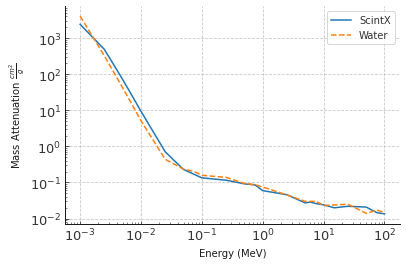

In [39]:
fig = plt.figure(facecolor='white')

plt.loglog(Xenergies, Xattenuations, ls='solid', label='ScintX')
plt.loglog(Wenergies, Wattenuations, ls='dashed', label='Water')
#plt.loglog(df['Energy'], df['u/p'],
#           #marker='o',
#           mfc='black',
#           linestyle='dotted',
#           #ms=3.5,
#           label='NIST Water')
plt.plot()
plt.legend()
plt.ylabel(r'Mass Attenuation $\frac{cm^2}{g}$')
plt.xlabel('Energy (MeV)')
#plt.title('Mass Attenuation values')
plt.show()

fig.savefig('../../figures/mass_attenuation/mass_attenuation.pdf')